**Importing Necessary Libraries**

In [1]:
import numpy as np 
import pandas as pd #
from matplotlib import pyplot as plt

**Reading the data**

In [2]:
data=pd.read_csv('/kaggle/input/dataset-digits/train.csv')

In [3]:
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Shuffling and splitting the data into train and test sets**

In [4]:
data=np.array(data)
m, n=data.shape
np.random.shuffle(data)

data_dev=data[0:1000].T
Y_dev=data_dev[0]
X_dev=data_dev[1:n]
X_dev = X_dev / 255.

data_train=data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]
X_train = X_train / 255.

**Defining custom unctions for operation of the neural network**

In [5]:
def init_params():
    W1=np.random.randn(10, 784)*0.1
    b1=np.random.randn(10, 1)
    W2=np.random.randn(10, 10)*0.1
    b2=np.random.randn(10, 1)
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)
 
def softmax(Z):
    return np.exp(Z)/sum(np.exp(Z))  

def fwd_prop(W1, b1, W2, b2, X):
    Z1=W1.dot(X)+b1
    A1=ReLU(Z1)
    Z2=W2.dot(A1)+b2
    A2=softmax(Z2)
    return Z1, A1, Z2, A2
    
def one_hot(Y):
    one_hot_Y=np.zeros((Y.size, Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y]=1
    one_hot_Y=one_hot_Y.T
    return one_hot_Y

def relu_deriv(Z):
    return Z>0
    
def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    m=Y.size
    one_hot_Y=one_hot(Y)
    dZ2=A2-one_hot_Y
    dW2=(1/m)*dZ2.dot(A1.T)
    db2=(1/m)*np.sum(dZ2)
    dZ1=W2.T.dot(dZ2)*relu_deriv(Z1)
    dW1=(1/m)*dZ1.dot(X.T)
    db1=(1/m)*np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1-=alpha*dW1
    b1-=alpha*db1
    W2-=alpha*dW2
    b2-=alpha*db2
    return W1, b1, W2, b2
    
    

In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions==Y)/Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2=init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2=fwd_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2=back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2=update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i%500==0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    print("Final Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

**Training the neural network**

In [7]:
W1, b1, W2, b2=gradient_descent(X_train, Y_train, 2000, 0.28)

Iteration:  0
[6 6 6 ... 6 6 6] [8 7 9 ... 5 3 4]
Accuracy:  0.09836585365853659
Iteration:  500
[8 7 9 ... 5 3 4] [8 7 9 ... 5 3 4]
Accuracy:  0.9156829268292683
Iteration:  1000
[8 7 9 ... 5 3 4] [8 7 9 ... 5 3 4]
Accuracy:  0.9299024390243903
Iteration:  1500
[8 7 9 ... 5 3 4] [8 7 9 ... 5 3 4]
Accuracy:  0.936
[8 7 9 ... 5 3 4] [8 7 9 ... 5 3 4]
Final Accuracy:  0.939560975609756


**Checking prediction for a random image**

In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = fwd_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


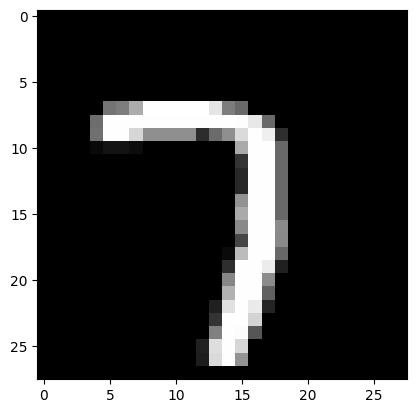

In [9]:
test_prediction(7598, W1, b1, W2, b2)